In [167]:
# Librería para manejo de datos
import pandas as pd
import numpy as np
# Librerías para graficar
import plotly.express as px
# Gráficas estáticas
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats


In [101]:
# Leer archivos csv y almacenarlos en Dataframes
taxis_201712 = pd.read_csv(r"yellow_tripdata_2017-12.csv", sep=',')
taxis_201812 = pd.read_csv(r"yellow_tripdata_2018-12.csv", sep=',')
taxis_201912 = pd.read_csv(r"yellow_tripdata_2019-12.csv", sep=',')
taxis_202012 = pd.read_csv(r"yellow_tripdata_2020-12.csv", sep=',')
zonas = pd.read_csv(r"zone_lookup.csv", sep=',')

C:\Users\Nirobe\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning:

Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.



In [4]:
#visualizar los primeros registros
taxis_201712.head(20)
taxis_201812.head(20)
taxis_201912.head(20)
taxis_202012.head(20)
zonas.head(20)

,LocationID,Borough,Zone,service_zone
0,1,EWR,Newark Airport,EWR
1,2,Queens,Jamaica Bay,Boro Zone
2,3,Bronx,Allerton/Pelham Gardens,Boro Zone
3,4,Manhattan,Alphabet City,Yellow Zone
4,5,Staten Island,Arden Heights,Boro Zone
5,6,Staten Island,Arrochar/Fort Wadsworth,Boro Zone
6,7,Queens,Astoria,Boro Zone
7,8,Queens,Astoria Park,Boro Zone
8,9,Queens,Auburndale,Boro Zone
9,10,Queens,Baisley Park,Boro Zone


In [102]:
#Sort de los datos
taxis_201712 = taxis_201712.sort_values(by=['tpep_pickup_datetime'])
taxis_201812 = taxis_201812.sort_values(by=['tpep_pickup_datetime'])
taxis_201912 = taxis_201912.sort_values(by=['tpep_pickup_datetime'])
taxis_202012 = taxis_202012.sort_values(by=['tpep_pickup_datetime'])

In [103]:
#Muestra de datos
#visualizar los primeros registros
taxis_201712 = taxis_201712.head(200000)
taxis_201812 = taxis_201812.head(200000)
taxis_201912 = taxis_201912.head(200000)
taxis_202012 = taxis_202012.head(200000)


In [40]:
taxis_202012

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
353944,2.0,2003-03-26 21:07:28,2003-03-27 13:30:46,1.0,0.00,1.0,N,193,193,1.0,2.5,0.0,0.5,0.01,0.00,0.3,3.31,0.0
267910,2.0,2008-12-31 23:08:07,2008-12-31 23:08:12,1.0,0.00,1.0,N,193,193,2.0,2.5,0.0,0.5,0.00,0.00,0.3,3.30,0.0
979812,2.0,2009-01-01 00:34:29,2009-01-01 00:52:13,1.0,4.99,1.0,N,132,203,2.0,16.0,0.5,0.5,0.00,0.00,0.3,17.30,0.0
1160098,2.0,2009-01-01 00:46:10,2009-01-01 01:16:52,2.0,9.36,1.0,N,132,39,2.0,28.5,0.0,0.5,0.00,0.00,0.3,29.30,0.0
571129,2.0,2009-01-01 02:26:49,2009-01-01 14:37:23,1.0,0.00,1.0,N,7,7,2.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184085,1.0,2020-12-04 15:33:22,2020-12-04 15:47:54,1.0,2.50,1.0,N,79,256,1.0,12.5,2.5,0.5,1.00,0.00,0.3,16.80,2.5
184182,2.0,2020-12-04 15:33:23,2020-12-04 15:37:01,1.0,0.85,1.0,N,239,142,1.0,5.0,0.0,0.5,1.00,0.00,0.3,9.30,2.5
184266,1.0,2020-12-04 15:33:23,2020-12-04 15:41:39,1.0,1.10,1.0,N,164,100,2.0,7.0,2.5,0.5,0.00,0.00,0.3,10.30,2.5
184901,2.0,2020-12-04 15:33:23,2020-12-04 15:44:59,1.0,1.95,1.0,N,68,158,1.0,9.5,0.0,0.5,2.56,0.00,0.3,15.36,2.5


In [17]:
# Revisar los tipos de data en el archivo
taxis_201712.dtypes
taxis_201812.dtypes
taxis_201912.dtypes
taxis_202012.dtypes


VendorID                 float64
tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count          float64
trip_distance            float64
RatecodeID               float64
store_and_fwd_flag        object
PULocationID               int64
DOLocationID               int64
payment_type             float64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
congestion_surcharge     float64
dtype: object

In [18]:
zonas.dtypes

LocationID       int64
Borough         object
Zone            object
service_zone    object
dtype: object

In [ ]:
payment_type 

In [41]:
#Se crea columna de años a partir de la fecha
taxis_201712['year'] = taxis_201712['tpep_pickup_datetime'].str.slice(0, 4)
taxis_201812['year'] = taxis_201812['tpep_pickup_datetime'].str.slice(0, 4)
taxis_201912['year'] = taxis_201912['tpep_pickup_datetime'].str.slice(0, 4)
taxis_202012['year'] = taxis_202012['tpep_pickup_datetime'].str.slice(0, 4)

In [42]:
#Se filtra registros que no esten en el año indicado
taxis_201712=taxis_201712.loc[taxis_201712['year'] == '2017']
taxis_201812=taxis_201812.loc[taxis_201812['year'] == '2018']
taxis_201912=taxis_201912.loc[taxis_201912['year'] == '2019']
taxis_202012=taxis_202012.loc[taxis_202012['year'] == '2020']

In [43]:
#Unimos los dataframes en uno solo
years2017_2018=pd.concat([taxis_201712, taxis_201812], ignore_index=True)

In [44]:
#Unimos los dataframes en uno solo
years2019_2020=pd.concat([taxis_201912, taxis_202012], ignore_index=True)

In [45]:
#Unimos los dataframes en uno solo
allyears=pd.concat([years2017_2018, years2019_2020], ignore_index=True)

In [46]:
#Para eliminar memoria de la RAM
del taxis_201712
del taxis_201812
del taxis_201912
del taxis_202012
del years2017_2018
del years2019_2020

In [47]:
#Visualizar columnas DF
allyears.columns
#allyears


Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'year', 'congestion_surcharge'],
      dtype='object')

In [48]:
allyears.max()

VendorID                                 4.0
tpep_pickup_datetime     2020-12-04 15:33:25
tpep_dropoff_datetime    2020-12-05 14:58:08
passenger_count                          9.0
trip_distance                      350104.58
RatecodeID                              99.0
PULocationID                             265
DOLocationID                             265
payment_type                             4.0
fare_amount                           1302.0
extra                                   17.5
mta_tax                                 65.0
tip_amount                             593.0
tolls_amount                           888.0
improvement_surcharge                    1.0
total_amount                          1302.8
year                                    2020
congestion_surcharge                     2.5
dtype: object

In [49]:
allyears_Analisis=allyears[['tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance','PULocationID', 'DOLocationID','tip_amount', 'tolls_amount','total_amount', 'year']]

In [50]:
del allyears

In [51]:
allyears_Analisis.dtypes

tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count          float64
trip_distance            float64
PULocationID               int64
DOLocationID               int64
tip_amount               float64
tolls_amount             float64
total_amount             float64
year                      object
dtype: object

In [52]:
allyears_Analisis

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,DOLocationID,tip_amount,tolls_amount,total_amount,year
0,2017-11-30 05:44:12,2017-11-30 06:10:40,1.0,12.50,7,188,7.46,0.00,44.76,2017
1,2017-11-30 05:46:42,2017-11-30 06:11:24,1.0,6.87,234,82,2.08,0.00,26.38,2017
2,2017-11-30 05:55:15,2017-11-30 06:04:13,1.0,3.14,170,145,3.69,0.00,15.99,2017
3,2017-11-30 06:04:38,2017-12-01 05:35:51,1.0,5.22,230,7,4.86,0.00,29.16,2017
4,2017-11-30 08:12:51,2017-12-01 07:39:57,2.0,9.99,161,181,6.00,5.76,42.56,2017
...,...,...,...,...,...,...,...,...,...,...
799801,2020-12-04 15:33:22,2020-12-04 15:47:54,1.0,2.50,79,256,1.00,0.00,16.80,2020
799802,2020-12-04 15:33:23,2020-12-04 15:37:01,1.0,0.85,239,142,1.00,0.00,9.30,2020
799803,2020-12-04 15:33:23,2020-12-04 15:41:39,1.0,1.10,164,100,0.00,0.00,10.30,2020
799804,2020-12-04 15:33:23,2020-12-04 15:44:59,1.0,1.95,68,158,2.56,0.00,15.36,2020


In [53]:
#El porcentaje de NaN en passenger_count es muy pequeño, asi que obviamos la omision.
allyears_Analisis.isna().sum()/len(allyears_Analisis)

tpep_pickup_datetime     0.000000
tpep_dropoff_datetime    0.000000
passenger_count          0.018931
trip_distance            0.000000
PULocationID             0.000000
DOLocationID             0.000000
tip_amount               0.000000
tolls_amount             0.000000
total_amount             0.000000
year                     0.000000
dtype: float64

In [54]:
#Se realiza join para encontrar Zona salida
allyears_Analisis_join_Salida=pd.merge(allyears_Analisis, zonas, how='left', left_on='PULocationID', right_on='LocationID')

In [55]:
del allyears_Analisis

In [56]:
allyears_Analisis_join_Salida

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,DOLocationID,tip_amount,tolls_amount,total_amount,year,LocationID,Borough,Zone,service_zone
0,2017-11-30 05:44:12,2017-11-30 06:10:40,1.0,12.50,7,188,7.46,0.00,44.76,2017,7,Queens,Astoria,Boro Zone
1,2017-11-30 05:46:42,2017-11-30 06:11:24,1.0,6.87,234,82,2.08,0.00,26.38,2017,234,Manhattan,Union Sq,Yellow Zone
2,2017-11-30 05:55:15,2017-11-30 06:04:13,1.0,3.14,170,145,3.69,0.00,15.99,2017,170,Manhattan,Murray Hill,Yellow Zone
3,2017-11-30 06:04:38,2017-12-01 05:35:51,1.0,5.22,230,7,4.86,0.00,29.16,2017,230,Manhattan,Times Sq/Theatre District,Yellow Zone
4,2017-11-30 08:12:51,2017-12-01 07:39:57,2.0,9.99,161,181,6.00,5.76,42.56,2017,161,Manhattan,Midtown Center,Yellow Zone
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799801,2020-12-04 15:33:22,2020-12-04 15:47:54,1.0,2.50,79,256,1.00,0.00,16.80,2020,79,Manhattan,East Village,Yellow Zone
799802,2020-12-04 15:33:23,2020-12-04 15:37:01,1.0,0.85,239,142,1.00,0.00,9.30,2020,239,Manhattan,Upper West Side South,Yellow Zone
799803,2020-12-04 15:33:23,2020-12-04 15:41:39,1.0,1.10,164,100,0.00,0.00,10.30,2020,164,Manhattan,Midtown South,Yellow Zone
799804,2020-12-04 15:33:23,2020-12-04 15:44:59,1.0,1.95,68,158,2.56,0.00,15.36,2020,68,Manhattan,East Chelsea,Yellow Zone


In [57]:
allyears_Analisis_join_Salida.isna().sum()/len(allyears_Analisis_join_Salida)

tpep_pickup_datetime     0.000000
tpep_dropoff_datetime    0.000000
passenger_count          0.018931
trip_distance            0.000000
PULocationID             0.000000
DOLocationID             0.000000
tip_amount               0.000000
tolls_amount             0.000000
total_amount             0.000000
year                     0.000000
LocationID               0.000000
Borough                  0.000000
Zone                     0.002054
service_zone             0.014257
dtype: float64

In [58]:
#Renombramos columnas para quitarlas a futuro, ya que las obtenemos del segundo join
allyears_Analisis_join_Salida=allyears_Analisis_join_Salida.rename(columns={"LocationID": "quitar", "Borough": "Borough_Salida", "Zone": "Zona_Salida", "service_zone": "service_zone_salida"})

In [59]:
allyears_Analisis_join_Salida

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,DOLocationID,tip_amount,tolls_amount,total_amount,year,quitar,Borough_Salida,Zona_Salida,service_zone_salida
0,2017-11-30 05:44:12,2017-11-30 06:10:40,1.0,12.50,7,188,7.46,0.00,44.76,2017,7,Queens,Astoria,Boro Zone
1,2017-11-30 05:46:42,2017-11-30 06:11:24,1.0,6.87,234,82,2.08,0.00,26.38,2017,234,Manhattan,Union Sq,Yellow Zone
2,2017-11-30 05:55:15,2017-11-30 06:04:13,1.0,3.14,170,145,3.69,0.00,15.99,2017,170,Manhattan,Murray Hill,Yellow Zone
3,2017-11-30 06:04:38,2017-12-01 05:35:51,1.0,5.22,230,7,4.86,0.00,29.16,2017,230,Manhattan,Times Sq/Theatre District,Yellow Zone
4,2017-11-30 08:12:51,2017-12-01 07:39:57,2.0,9.99,161,181,6.00,5.76,42.56,2017,161,Manhattan,Midtown Center,Yellow Zone
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799801,2020-12-04 15:33:22,2020-12-04 15:47:54,1.0,2.50,79,256,1.00,0.00,16.80,2020,79,Manhattan,East Village,Yellow Zone
799802,2020-12-04 15:33:23,2020-12-04 15:37:01,1.0,0.85,239,142,1.00,0.00,9.30,2020,239,Manhattan,Upper West Side South,Yellow Zone
799803,2020-12-04 15:33:23,2020-12-04 15:41:39,1.0,1.10,164,100,0.00,0.00,10.30,2020,164,Manhattan,Midtown South,Yellow Zone
799804,2020-12-04 15:33:23,2020-12-04 15:44:59,1.0,1.95,68,158,2.56,0.00,15.36,2020,68,Manhattan,East Chelsea,Yellow Zone


In [60]:
#Se realiza join para encontrar Zona llegada
allyears_Analisis_join=pd.merge(allyears_Analisis_join_Salida, zonas, how='left', left_on='DOLocationID', right_on='LocationID')

In [61]:
# Podemos comprobar las ausencias con esta línea de código. 
allyears_Analisis_join.isna().sum()/len(allyears_Analisis_join)

tpep_pickup_datetime     0.000000
tpep_dropoff_datetime    0.000000
passenger_count          0.018931
trip_distance            0.000000
PULocationID             0.000000
DOLocationID             0.000000
tip_amount               0.000000
tolls_amount             0.000000
total_amount             0.000000
year                     0.000000
quitar                   0.000000
Borough_Salida           0.000000
Zona_Salida              0.002054
service_zone_salida      0.014257
LocationID               0.000000
Borough                  0.000000
Zone                     0.002421
service_zone             0.013430
dtype: float64

In [62]:
allyears_Analisis_join

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,DOLocationID,tip_amount,tolls_amount,total_amount,year,quitar,Borough_Salida,Zona_Salida,service_zone_salida,LocationID,Borough,Zone,service_zone
0,2017-11-30 05:44:12,2017-11-30 06:10:40,1.0,12.50,7,188,7.46,0.00,44.76,2017,7,Queens,Astoria,Boro Zone,188,Brooklyn,Prospect-Lefferts Gardens,Boro Zone
1,2017-11-30 05:46:42,2017-11-30 06:11:24,1.0,6.87,234,82,2.08,0.00,26.38,2017,234,Manhattan,Union Sq,Yellow Zone,82,Queens,Elmhurst,Boro Zone
2,2017-11-30 05:55:15,2017-11-30 06:04:13,1.0,3.14,170,145,3.69,0.00,15.99,2017,170,Manhattan,Murray Hill,Yellow Zone,145,Queens,Long Island City/Hunters Point,Boro Zone
3,2017-11-30 06:04:38,2017-12-01 05:35:51,1.0,5.22,230,7,4.86,0.00,29.16,2017,230,Manhattan,Times Sq/Theatre District,Yellow Zone,7,Queens,Astoria,Boro Zone
4,2017-11-30 08:12:51,2017-12-01 07:39:57,2.0,9.99,161,181,6.00,5.76,42.56,2017,161,Manhattan,Midtown Center,Yellow Zone,181,Brooklyn,Park Slope,Boro Zone
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799801,2020-12-04 15:33:22,2020-12-04 15:47:54,1.0,2.50,79,256,1.00,0.00,16.80,2020,79,Manhattan,East Village,Yellow Zone,256,Brooklyn,Williamsburg (South Side),Boro Zone
799802,2020-12-04 15:33:23,2020-12-04 15:37:01,1.0,0.85,239,142,1.00,0.00,9.30,2020,239,Manhattan,Upper West Side South,Yellow Zone,142,Manhattan,Lincoln Square East,Yellow Zone
799803,2020-12-04 15:33:23,2020-12-04 15:41:39,1.0,1.10,164,100,0.00,0.00,10.30,2020,164,Manhattan,Midtown South,Yellow Zone,100,Manhattan,Garment District,Yellow Zone
799804,2020-12-04 15:33:23,2020-12-04 15:44:59,1.0,1.95,68,158,2.56,0.00,15.36,2020,68,Manhattan,East Chelsea,Yellow Zone,158,Manhattan,Meatpacking/West Village West,Yellow Zone


In [63]:
#Renombramos columnas para quitarlas a futuro, ya que las obtenemos del segundo join
allyears_Analisis_join=allyears_Analisis_join.rename(columns={"Borough": "Borough_Llegada", "Zone": "Zona_Llegada", "service_zone": "service_zone_llegada"})

In [64]:
del allyears_Analisis_join_Salida

In [65]:
#Se saca los valores maximos de cada variable
#Se observa que para las variables de trip_distancia, passenger_count y total_amount los valores maximos se aleja
# de un resultado esperado. Se consideran como posibles outliers dentro del data set de los últimos cuatro años.
allyears_Analisis_join.max()

tpep_pickup_datetime     2020-12-04 15:33:25
tpep_dropoff_datetime    2020-12-05 14:58:08
passenger_count                          9.0
trip_distance                      350104.58
PULocationID                             265
DOLocationID                             265
tip_amount                             593.0
tolls_amount                           888.0
total_amount                          1302.8
year                                    2020
quitar                                   265
Borough_Salida                       Unknown
LocationID                               265
Borough_Llegada                      Unknown
dtype: object

In [66]:
#Medidas de tendencia central y de dispersión para la variable passenger_count
print(allyears_Analisis_join['passenger_count'].describe())
#Moda
print('Moda')
print(allyears_Analisis_join['passenger_count'].mode()[0])
#Mediana
print('Mediana')
print(allyears_Analisis_join['passenger_count'].median())

count    784665.000000
mean          1.548985
std           1.197110
min           0.000000
25%           1.000000
50%           1.000000
75%           2.000000
max           9.000000
Name: passenger_count, dtype: float64
Moda
1.0
Mediana
1.0


In [67]:
##Medidas de tendencia central y de dispersión para la variable total_amount
print(allyears_Analisis_join['total_amount'].describe())
#Moda
print('Moda')
print(allyears_Analisis_join['total_amount'].mode()[0])
#Mediana
print('Mediana')
print(allyears_Analisis_join['total_amount'].median())

count    799806.000000
mean         17.299262
std          14.624471
min        -412.040000
25%           9.750000
50%          12.960000
75%          18.800000
max        1302.800000
Name: total_amount, dtype: float64
Moda
8.8
Mediana
12.96


In [71]:
#Se crea grafica de boxplot para la muestra
#fig = px.box(allyears_Analisis_join, y="total_amount")
#fig.show()

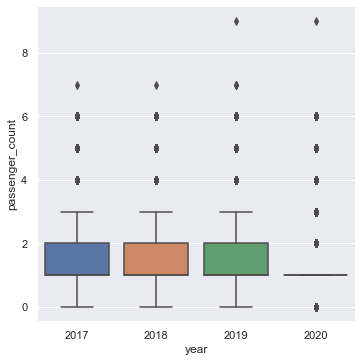

In [88]:
#Grafica de cantidad pasajeros de viajes en cada año
sns.catplot(x = "year", y = "passenger_count", data = allyears_Analisis_join, kind = "box");
plt.show()

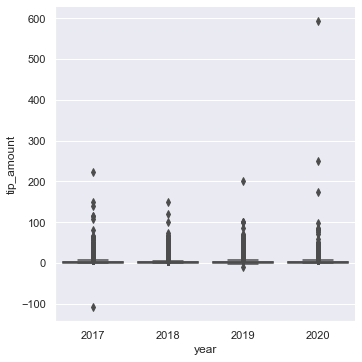

In [91]:
#Grafica de tip amount de viajes en cada año
sns.catplot(x = "year", y = "tip_amount", data = allyears_Analisis_join, kind = "box");
plt.show()

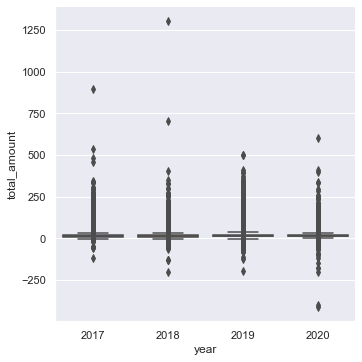

In [155]:
#Grafica de total amount de viajes en cada año
sns.catplot(x = "year", y = "total_amount", data = allyears_Analisis_join, kind = "box");
plt.show()

In [139]:
#Se crea un nuevo dataframe con los datos necesarios de la muestra
dfTotal =  allyears_Analisis_join[['year','total_amount','trip_distance','tip_amount','tolls_amount','passenger_count']]

In [141]:
dfGroupBy = dfTotal.groupby('year').sum('total_amount')
dfGroupBy['years'] = [2017, 2018, 2019, 2020]

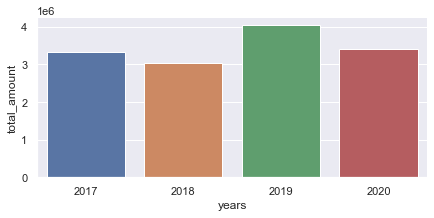

In [154]:
#Grafica de barras para el total amount por año
sns.catplot(x="years", y="total_amount", data=dfGroupBy, kind = "bar", height = 3, aspect = 2);

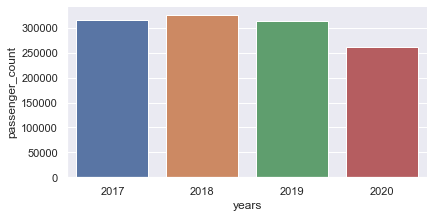

In [157]:
#Grafica de barras para el passengers count  por año
sns.catplot(x="years", y="passenger_count", data=dfGroupBy, kind = "bar", height = 3, aspect = 2);

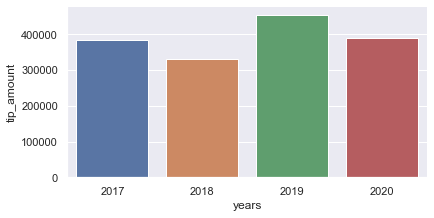

In [158]:
#Grafica de barras para el tip  amount por año
sns.catplot(x="years", y="tip_amount", data=dfGroupBy, kind = "bar", height = 3, aspect = 2);

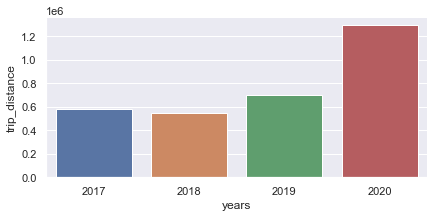

In [159]:
#Grafica de barras para el tip  amount por año
sns.catplot(x="years", y="trip_distance", data=dfGroupBy, kind = "bar", height = 3, aspect = 2);

In [162]:
#Calculo del Anova 
#Hipotesis Nula: H0 - las medias de passenger count para los cuatro años de analisis de la muestra son iguales

# Crear la estructura de tabla ANOVA 
data_col = [['SSA', '', '', '', '', ''], ['SSE', '', '', '', '', ''], ['Total', '', '', '', '', '']] 
anova_tabla = pd.DataFrame(data_col, columns = ['Fuente de variación', 'SS', 'gdl', 'MS', 'F', 'P-valor']) 
anova_tabla.set_index('Fuente de variación', inplace = True)
anova_tabla

# Calcular la SSA y actualizamos la tabla
promedio_edad = allyears_Analisis_join['passenger_count'].mean()
SSA = allyears_Analisis_join.groupby('year').count() * (allyears_Analisis_join.groupby('year').mean() - promedio_edad)**2
anova_tabla.at['SSA', 'SS'] = SSA['passenger_count'].sum()

# Calculas la SSE y actualizar en la tabla
SSE = (allyears_Analisis_join.groupby('year').count() - 1) * allyears_Analisis_join.groupby('year').std()**2
anova_tabla.at['SSE', 'SS'] = SSE['passenger_count'].sum()

# Calcular SST y actualizar en la tabla
SST = SSA['passenger_count'].sum() + SSE['passenger_count'].sum()
anova_tabla.at['Total', 'SS']= SST


In [168]:
# Calcular los grados de libertad
anova_tabla['gdl']['SSA'] = allyears_Analisis_join['year'].nunique() - 1
anova_tabla['gdl']['SSE'] = allyears_Analisis_join.shape[0] - allyears_Analisis_join['year'].nunique()
anova_tabla['gdl']['Total'] = allyears_Analisis_join.shape[0] - 1

# Calcular MS
anova_tabla['MS'] = anova_tabla['SS'] / anova_tabla['gdl']

# Calcular F 
F = anova_tabla['MS']['SSA'] / anova_tabla['MS']['SSE']
anova_tabla.at['SSA','F'] = F

# Calcular p-valor
anova_tabla.at['SSA','P-valor'] = 1 - stats.f.cdf(F, anova_tabla.at['SSA','gdl'], anova_tabla.at['SSE','gdl'])

# Visualizar tabla ANOVA
anova_tabla


,SS,gdl,MS,F,P-valor
Fuente de variación,,,,,
SSA,5511.671616,3,1837.223872,1313.188236,0.0
SSE,1118967.781863,799802,1.399056,,
Total,1124479.453479,799805,1.405942,,


In [169]:
# Evaluar la hipótesis con un nivel de confianza del 95% y significancia del 5%
alpha=0.05 #Establecer la significancia
# Evaluar la hipótesis
print("Usar el P-valor para decidir sobre la hipótesis")
if anova_tabla.at['SSA','P-valor'] <= alpha:
    conclusion = "Se rechaza hipótesis nula "
else:
    conclusion = "No se rechaza hipótesis nula "
print(conclusion)
print("Valor F es:", anova_tabla['F']['SSA'], " y el P-valor es:", anova_tabla['P-valor']['SSA']) 

Usar el P-valor para decidir sobre la hipótesis
Se rechaza hipótesis nula 
Valor F es: 1313.1882356764002  y el P-valor es: 1.1102230246251565e-16


In [171]:
print(taxis_201712['passenger_count'].mean())
print(taxis_201812['passenger_count'] .mean())
print(taxis_201912['passenger_count'] .mean())
print(taxis_202012['passenger_count'] .mean())

1.577305
1.629765
1.575368081352388
1.4038898032508256


In [173]:
dftotal = dfGroupBy.sum()

In [175]:
#Se calcula los porcentajes de la variable total_amount en el total de los cuatro años analizados
print(dfGroupBy['total_amount'] / dftotal['total_amount']*100)

year
2017    24.144828
2018    21.963092
2019    29.186018
2020    24.706062
Name: total_amount, dtype: float64


In [176]:
#Se calcula los porcentajes de la variable tip_amount en el total de los cuatro años analizados
print(dfGroupBy['tip_amount'] / dftotal['tip_amount']*100)

year
2017    24.620362
2018    21.202637
2019    29.179194
2020    24.997807
Name: tip_amount, dtype: float64


In [177]:
#Se calcula los porcentajes de la variable passenger_count en el total de los cuatro años analizados
print(dfGroupBy['passenger_count'] / dftotal['passenger_count']*100)


year
2017    25.947357
2018    26.806145
2019    25.772193
2020    21.474305
Name: passenger_count, dtype: float64
